In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
df = pd.read_csv('/content/drive/MyDrive/titanic.csv')
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1, inplace = True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [128]:
for i in df.columns:
    print(df[i].isnull().values.any())

False
False
True
False
False
False
True
False


In [129]:
nans = 0
for i in df['Age'].isnull().values:
    if i:
        nans += 1
print(nans)

177


In [130]:
nans = 0
for i in df['Embarked'].isnull().values:
    if i:
        nans += 1
print(nans)

2


In [131]:
df.dropna(inplace = True)

In [132]:
df.replace({'male': 1, 'female': 0}, inplace = True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,S,0
1,1,0,38.0,1,0,71.2833,C,1
2,3,0,26.0,0,0,7.9250,S,1
3,1,0,35.0,1,0,53.1000,S,1
4,3,1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,Q,0
886,2,1,27.0,0,0,13.0000,S,0
887,1,0,19.0,0,0,30.0000,S,1
889,1,1,26.0,0,0,30.0000,C,1


In [133]:
df.replace({'S': 0, 'C': 1, 'Q': 2}, inplace = True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0,0
1,1,0,38.0,1,0,71.2833,1,1
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,2,0
886,2,1,27.0,0,0,13.0000,0,0
887,1,0,19.0,0,0,30.0000,0,1
889,1,1,26.0,0,0,30.0000,1,1


In [134]:
for i in df.columns:
    print((df[i].eq('exact_string')).any())


False
False
False
False
False
False
False
False


In [135]:
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0,0
1,1,0,38.0,1,0,71.2833,1,1
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,0
6,1,1,54.0,0,0,51.8625,0,0
7,3,1,2.0,3,1,21.0750,0,0
8,3,0,27.0,0,2,11.1333,0,1
9,2,0,14.0,1,0,30.0708,1,1
10,3,0,4.0,1,1,16.7000,0,1


In [136]:
age_grouped = []

for i in df['Age']:
    age_grouped.append(i - (i % 5))

df['Age_grouped'] = age_grouped
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Age_grouped
0,3,1,22.0,1,0,7.2500,0,0,20.0
1,1,0,38.0,1,0,71.2833,1,1,35.0
2,3,0,26.0,0,0,7.9250,0,1,25.0
3,1,0,35.0,1,0,53.1000,0,1,35.0
4,3,1,35.0,0,0,8.0500,0,0,35.0


In [137]:
count = (df['Survived'] == 1).sum()
count

288

In [138]:
fare_grouped = []

for i in df['Fare']:
    fare_grouped.append(i - (i % 20))

df['Fare_grouped'] = fare_grouped
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Age_grouped,Fare_grouped
0,3,1,22.0,1,0,7.2500,0,0,20.0,0.0
1,1,0,38.0,1,0,71.2833,1,1,35.0,60.0
2,3,0,26.0,0,0,7.9250,0,1,25.0,0.0
3,1,0,35.0,1,0,53.1000,0,1,35.0,40.0
4,3,1,35.0,0,0,8.0500,0,0,35.0,0.0


In [139]:
df.Sex

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 712, dtype: int64

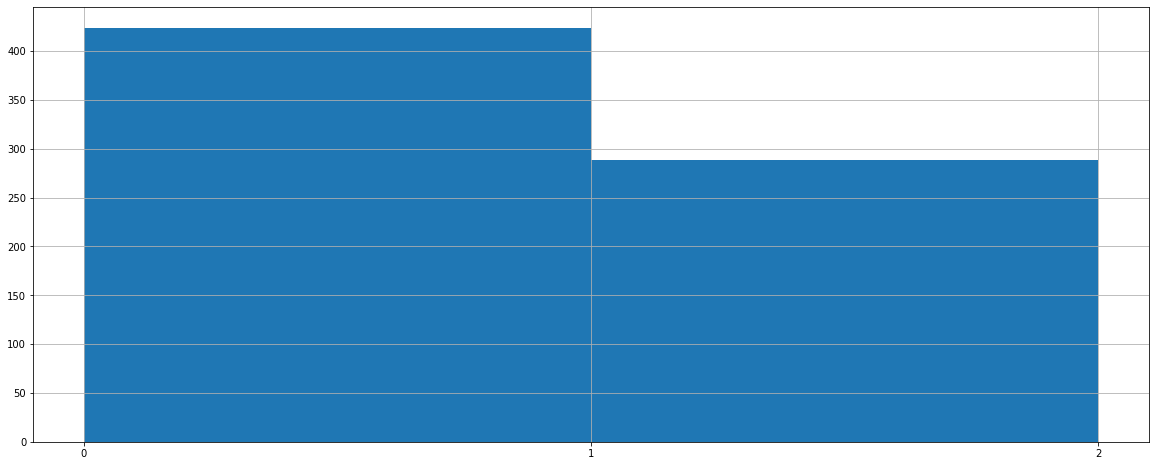

In [140]:
feature = 'Survived'
fig,ax = plt.subplots(1,1, figsize = (20, 8))

bins = np.concatenate((np.sort(df[feature].unique()), np.array(np.sort(df[feature].unique())[-1] + 1)), axis = None)

ax.hist(df[feature], bins = bins)
ax.set_xticks(bins)
plt.grid()

In [141]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Age_grouped,Fare_grouped
0,3,1,22.0,1,0,7.2500,0,0,20.0,0.0
1,1,0,38.0,1,0,71.2833,1,1,35.0,60.0
2,3,0,26.0,0,0,7.9250,0,1,25.0,0.0
3,1,0,35.0,1,0,53.1000,0,1,35.0,40.0
4,3,1,35.0,0,0,8.0500,0,0,35.0,0.0


In [142]:
df_survived = df.loc[df['Survived'] == 1]    
df_survived.shape

(288, 10)

In [143]:
df_dead = df.loc[df['Survived'] == 0]
df_dead.shape

(424, 10)

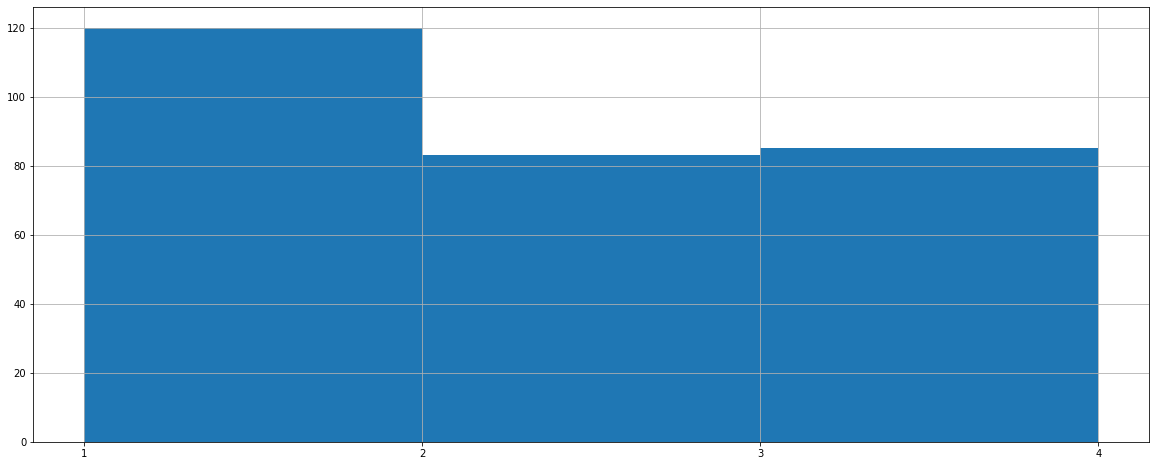

In [144]:
feature = 'Pclass'
fig,ax = plt.subplots(1,1, figsize = (20, 8))

bins = np.concatenate((np.sort(df[feature].unique()), np.array(np.sort(df[feature].unique())[-1] + 1)), axis = None)

ax.hist(df_survived[feature], bins = bins)
ax.set_xticks(bins)
plt.grid()

In [145]:
# prior probabilities 
P_survived = df_survived.shape[0]/df.shape[0]
P_dead = 1 - P_survived

P_dead

0.5955056179775281

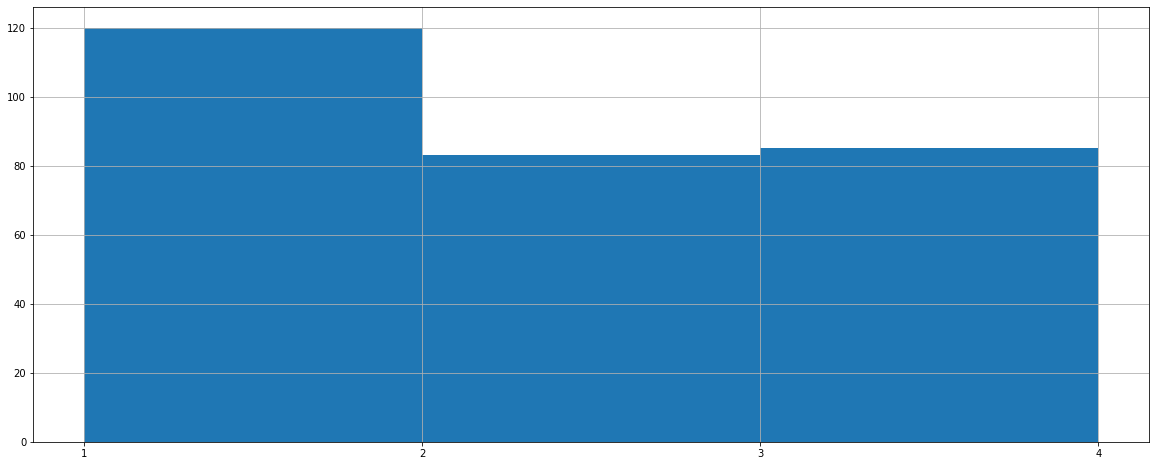

In [146]:
feature = 'Pclass'
fig,ax = plt.subplots(1,1, figsize = (20, 8))

bins = np.concatenate((np.sort(df[feature].unique()), np.array(np.sort(df[feature].unique())[-1] + 1)), axis = None)

ax.hist(df_survived[feature], bins = bins)
ax.set_xticks(bins)
plt.grid()

In [147]:
df.drop(['Age', 'Fare'], axis = 1, inplace = True)

In [148]:
df_survived.drop(['Age', 'Fare'], axis = 1, inplace = True)
df_dead.drop(['Age', 'Fare'], axis = 1, inplace = True)

<ipython-input-148-23c5aa57b1c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survived.drop(['Age', 'Fare'], axis = 1, inplace = True)
<ipython-input-148-23c5aa57b1c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dead.drop(['Age', 'Fare'], axis = 1, inplace = True)


In [149]:
len(df)

712

In [150]:
test_factor = 0.9
x_train, x_test, y_train, y_test = df.drop(['Survived'], axis = 1)[:int(np.ceil(test_factor * len(df)))], df.drop(['Survived'], axis = 1)[int(np.ceil(test_factor * len(df))):], df['Survived'][:int(np.ceil(test_factor * len(df)))], df['Survived'][int(np.ceil(test_factor * len(df))):]
df_survived_train, df_dead_train, df_survived_test, df_dead_test = df_survived[:int(np.ceil(test_factor * len(df_survived)))], df_dead[:int(np.ceil(test_factor * len(df_dead)))], df_survived[int(np.ceil(test_factor * len(df_survived))):], df_dead[int(np.ceil(test_factor * len(df_dead))):]

In [151]:
df_survived_train

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Age_grouped,Fare_grouped
1,1,0,1,0,1,1,35.0,60.0
2,3,0,0,0,0,1,25.0,0.0
3,1,0,1,0,0,1,35.0,40.0
8,3,0,0,2,0,1,25.0,0.0
9,2,0,1,0,1,1,10.0,20.0
...,...,...,...,...,...,...,...,...
788,3,1,1,2,0,1,0.0,20.0
796,1,0,0,0,0,1,45.0,20.0
797,3,0,0,0,0,1,30.0,0.0
801,2,0,1,1,0,1,30.0,20.0


In [152]:
P_feature_survived = []
P_feature_dead = []

for i in df_survived_train.drop(['Survived'], axis = 1):
    P_feature_survived.append({"title": i})
    P_feature_dead.append({"title": i})

for i in P_feature_survived:
    uniques = np.sort(df_survived_train.drop(['Survived'], axis = 1)[i['title']].unique())
    for j in uniques:
        i[j] = df_survived_train[i['title']].value_counts()[j] / len(df_survived_train)

for i in P_feature_dead:
    uniques = np.sort(df_dead_train.drop(['Survived'], axis = 1)[i['title']].unique())
    for j in uniques:
        i[j] = df_dead_train[i['title']].value_counts()[j] / len(df_dead_train)

P_feature_survived

[{'title': 'Pclass',
  1: 0.4153846153846154,
  2: 0.29615384615384616,
  3: 0.28846153846153844},
 {'title': 'Sex', 0: 0.676923076923077, 1: 0.3230769230769231},
 {'title': 'SibSp',
  0: 0.5961538461538461,
  1: 0.3346153846153846,
  2: 0.04230769230769231,
  3: 0.015384615384615385,
  4: 0.011538461538461539},
 {'title': 'Parch',
  0: 0.6538461538461539,
  1: 0.18846153846153846,
  2: 0.14615384615384616,
  3: 0.007692307692307693,
  5: 0.0038461538461538464},
 {'title': 'Embarked',
  0: 0.7076923076923077,
  1: 0.26153846153846155,
  2: 0.03076923076923077},
 {'title': 'Age_grouped',
  0.0: 0.08846153846153847,
  5.0: 0.04230769230769231,
  10.0: 0.026923076923076925,
  15.0: 0.11153846153846154,
  20.0: 0.14615384615384616,
  25.0: 0.11923076923076924,
  30.0: 0.1423076923076923,
  35.0: 0.11923076923076924,
  40.0: 0.06538461538461539,
  45.0: 0.05,
  50.0: 0.046153846153846156,
  55.0: 0.019230769230769232,
  60.0: 0.019230769230769232,
  80.0: 0.0038461538461538464},
 {'title': 

In [153]:
prob = np.array(x_test[:1])[0]
prob

array([ 3.,  1.,  0.,  0.,  0., 30.,  0.])

In [154]:
P_survived_feature = P_survived

for index, element in enumerate(P_feature_survived):
    P_survived_feature *= element[prob[index]]

P_survived_feature

0.000574858752631216

In [155]:
P_dead_feature = P_dead

for index, element in enumerate(P_feature_dead):
    P_dead_feature *= element[prob[index]]

P_dead_feature

0.01160812901088395

In [156]:
y_test[:1]

805    0
Name: Survived, dtype: int64